# Time Complexity Analysis for The $\mathcal S ^2 $ Data Generation

In this section, we provide a detailed analysis and proof of the time complexity of the $S^2$ data generation mechanism. Our theoretical analysis shows that the time complexity of data generation is proportional to the length $L$ of the time series. We will then verify the specific time required for data generation using multiple sets of different lengths to validate our theoretical analysis.

We define the specific symbol explanation and its  as follows. Then we use the divide-and-conquer approach to analyze the complexity of our $S^2$ data generation mechanism.

| symbol | explanation                                                  |
| ------ | ------------------------------------------------------------ |
| $L$    | The length of time series                                    |
| $M$    | Number of input channels                                     |
| $N$    | Number of output channels                                    |
| $k$    | Total number of mixed distributions used                     |
| $p$    | Autoregressive model order in ARMA model                     |
| $q$    | Moving average model order in ARMA model                     |
| $P$    | Probability of choosing a sampling method                    |
| $b$    | Number of binary operators used to construct symbolic expressions |
| $u$    | The number of unary operators used to construct symbolic expressions |

1. **Symbolic Expression Generation**: We construct symbolic expressions using a tree structure as a medium. When we have $b$ binary operators, we further insert $(b + 1)$ leaf nodes (the process from (a) to (b) in **Figure 3** in our paper). Therefore, after inserting $u$ unary operators (**Figure 3** (c)), the total number of nodes in the tree is $n = 2b + u + 1$. Because there are many ways to construct a tree, we consider the time complexity of constructing a balanced tree. Therefore, for $N$ symbols constructed, the specific complexity of this process is:

$$
O(N\times n\mathrm{log}n)
$$

2. **Sampling series generation**: When we want to generate a sampling time series with $M$ channels, each channel has a probability of $P$ to be sampled using a mixture distribution and a probability of $(1-P)$ to be sampled using an ARMA model. When the sampling length of the series is $L$, the complexity of generating $k$ mixture distribution and ARMA ($p$, $q$) series is $O(kL)$ and $O(L(p+q))$. Therefore, the time complexity of this process can be quantified as:

$$
O \left ( ML \times [Pk + (1-P)(p+q)] \right )
$$

3. **Sampling through symbolic expressions and series**: We simplify the specific operational details of this process and only consider the time complexity of operations with variables. For a series of length L, we have $N$ symbolic expressions to be sampled, and each symbol has an average of $\frac{M+1}{2}$ variables (Each symbolic expression may contain any number of variables from 1 to M, so here we take $\frac{M+1}{2}=\frac{(1+2+\cdots+M)}{M}$ as the average probability). Then the process can be quantified as:

$$
O(N \cdot \frac{M+1}{2}\cdot L)
$$

To sum up, since other variables that affect the $S^2$ sampling process are usually small, it can be intuitively understood that the time complexity of the entire sampling process is proportional to the length $L$.

In [4]:
import time
import numpy as np
from tqdm import tqdm

from S2Generator import Generator

In the following experiment, we generate time series data with a length interval of 16 and calculate the specific time required.

In [10]:
# Create the generator instance
generator = Generator()

# The number of generated data
try_count = 128

length_array = np.arange(16, 512, 16)

time_array = np.zeros_like(length_array)

# Variables with different time lengths
for index, n_points in enumerate(length_array):
    start = time.time()
    for seed in tqdm(range(try_count)):
        # Create the random number generator
        rng = np.random.RandomState(seed)

        # Start generating data
        generator.run(
            rng=rng, input_dimension=1, output_dimension=1, n_inputs_points=n_points
        )

    # Record the time required for this length
    end = time.time()
    time_array[index] = end - start

    # Print status information
    print(f"Generate Length: {n_points}, Time: {end - start}!")

100%|██████████| 64/64 [00:03<00:00, 19.98it/s]


Generate Length: 16, Time: 3.2037699222564697!


100%|██████████| 64/64 [00:03<00:00, 20.03it/s]


Generate Length: 32, Time: 3.196638822555542!


100%|██████████| 64/64 [00:02<00:00, 21.65it/s]


Generate Length: 48, Time: 2.9577019214630127!


100%|██████████| 64/64 [00:03<00:00, 21.22it/s]


Generate Length: 64, Time: 3.018876552581787!


100%|██████████| 64/64 [00:03<00:00, 16.87it/s]


Generate Length: 80, Time: 3.795687437057495!


100%|██████████| 64/64 [00:04<00:00, 15.89it/s]


Generate Length: 96, Time: 4.029794692993164!


100%|██████████| 64/64 [00:04<00:00, 13.73it/s]


Generate Length: 112, Time: 4.662473917007446!


100%|██████████| 64/64 [00:05<00:00, 12.31it/s]


Generate Length: 128, Time: 5.201029539108276!


100%|██████████| 64/64 [00:05<00:00, 10.91it/s]


Generate Length: 144, Time: 5.865360975265503!


100%|██████████| 64/64 [00:06<00:00,  9.33it/s]


Generate Length: 160, Time: 6.8657379150390625!


100%|██████████| 64/64 [00:07<00:00,  8.83it/s]


Generate Length: 176, Time: 7.251554012298584!


100%|██████████| 64/64 [00:07<00:00,  8.59it/s]


Generate Length: 192, Time: 7.455835819244385!


100%|██████████| 64/64 [00:08<00:00,  7.82it/s]


Generate Length: 208, Time: 8.18045425415039!


100%|██████████| 64/64 [00:09<00:00,  6.94it/s]


Generate Length: 224, Time: 9.22823166847229!


100%|██████████| 64/64 [00:10<00:00,  6.23it/s]


Generate Length: 240, Time: 10.28029203414917!


100%|██████████| 64/64 [00:10<00:00,  6.17it/s]


Generate Length: 256, Time: 10.368523836135864!


100%|██████████| 64/64 [00:12<00:00,  5.13it/s]


Generate Length: 272, Time: 12.483007669448853!


100%|██████████| 64/64 [00:13<00:00,  4.68it/s]


Generate Length: 288, Time: 13.678375482559204!


100%|██████████| 64/64 [00:12<00:00,  5.21it/s]


Generate Length: 304, Time: 12.286718606948853!


100%|██████████| 64/64 [00:12<00:00,  5.04it/s]


Generate Length: 320, Time: 12.699472427368164!


100%|██████████| 64/64 [00:13<00:00,  4.66it/s]


Generate Length: 336, Time: 13.73013424873352!


100%|██████████| 64/64 [00:15<00:00,  4.07it/s]


Generate Length: 352, Time: 15.73879885673523!


100%|██████████| 64/64 [00:16<00:00,  3.91it/s]


Generate Length: 368, Time: 16.362650632858276!


100%|██████████| 64/64 [00:16<00:00,  3.79it/s]


Generate Length: 384, Time: 16.890089511871338!


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


Generate Length: 400, Time: 17.161365509033203!


100%|██████████| 64/64 [00:22<00:00,  2.88it/s]


Generate Length: 416, Time: 22.19209337234497!


100%|██████████| 64/64 [00:22<00:00,  2.90it/s]


Generate Length: 432, Time: 22.098965644836426!


100%|██████████| 64/64 [00:21<00:00,  2.97it/s]


Generate Length: 448, Time: 21.55982995033264!


100%|██████████| 64/64 [00:26<00:00,  2.44it/s]


Generate Length: 464, Time: 26.206479787826538!


100%|██████████| 64/64 [00:25<00:00,  2.53it/s]


Generate Length: 480, Time: 25.284049034118652!


100%|██████████| 64/64 [00:29<00:00,  2.15it/s]

Generate Length: 496, Time: 29.824182271957397!


From the above experimental results, we can generally see that the time required for data generation is generally proportional to the length of the time series.
However, consider that in many cases, when we construct the symbolic expression $f(\cdot)$ and input the stimulus time series $X$ into the system to obtain the corresponding $Y=f(X)$, the values ​​of the stimulus time series may fall outside the domain of the symbolic expression $f(\cdot)$, resulting in sampling failure. This phenomenon will affect the sampling time.

Text(0, 0.5, 'The time spent')

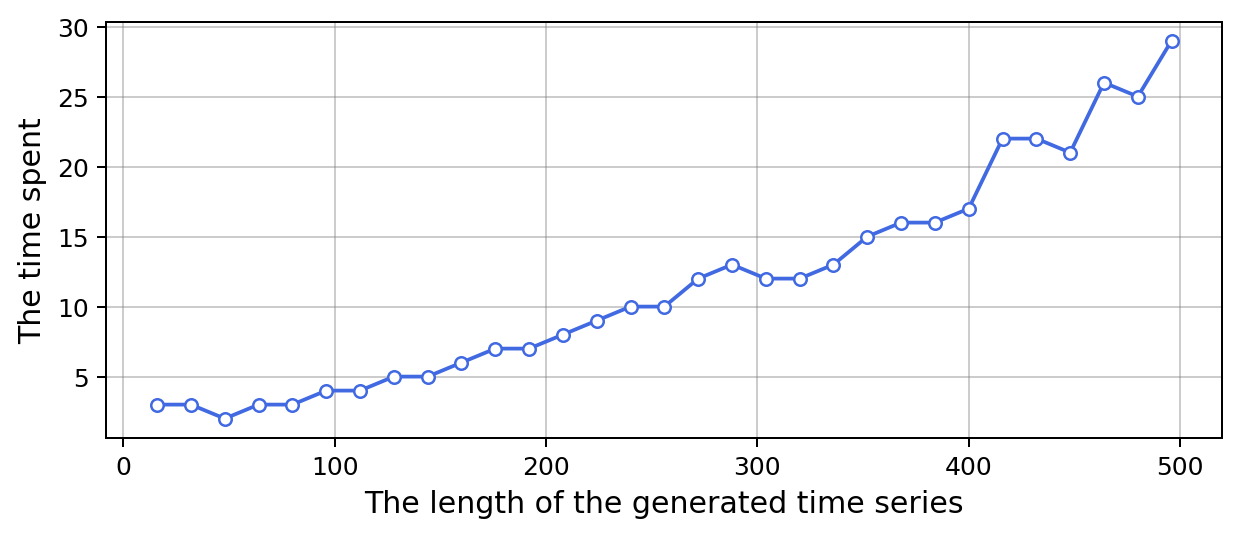

In [22]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3), dpi=180)

ax.plot(
    length_array,
    time_array,
    color="royalblue",
    marker="o",
    markersize=5,
    markerfacecolor="white",
)
ax.grid("--", color="gray", alpha=0.4)
ax.set_xlabel("The length of the generated time series", fontsize=12)
ax.set_ylabel("The time spent", fontsize=12)

In [23]:
fig.savefig("time_complexity_analysis.pdf", dpi=1200, bbox_inches="tight")